## 鸢尾花分类

In [4]:
import pandas as pd

data=pd.read_csv("iris.csv",encoding='gbk')
data

,Id,花萼长度,花萼宽度,花瓣长度,花瓣宽度,种类
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data.drop('Id',axis=1,inplace=True) # 删除id列，没有实际意义

In [12]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

x=data.drop('种类',axis=1) #提取自变量,axis=1表示以列删除；默认删除行
y=data['种类'] # 提取目标变量
x

,花萼长度,花萼宽度,花瓣长度,花瓣宽度
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# 只需要对输入的值x缩放
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
#导入决策树算法
from sklearn.tree import DecisionTreeClassifier
# entropy参数表示信息增益。使用信息增益方法从数据集中构建一棵树。
model = DecisionTreeClassifier(criterion='entropy', random_state=0)
# 训练
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [19]:
y_pred = model.predict(X_test)# 预测
y_pred 

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [20]:
# 导入准确度分数方法
from sklearn.metrics import accuracy_score
# 计算准确度
accuracy_score(y_pred,y_test)

0.9736842105263158

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



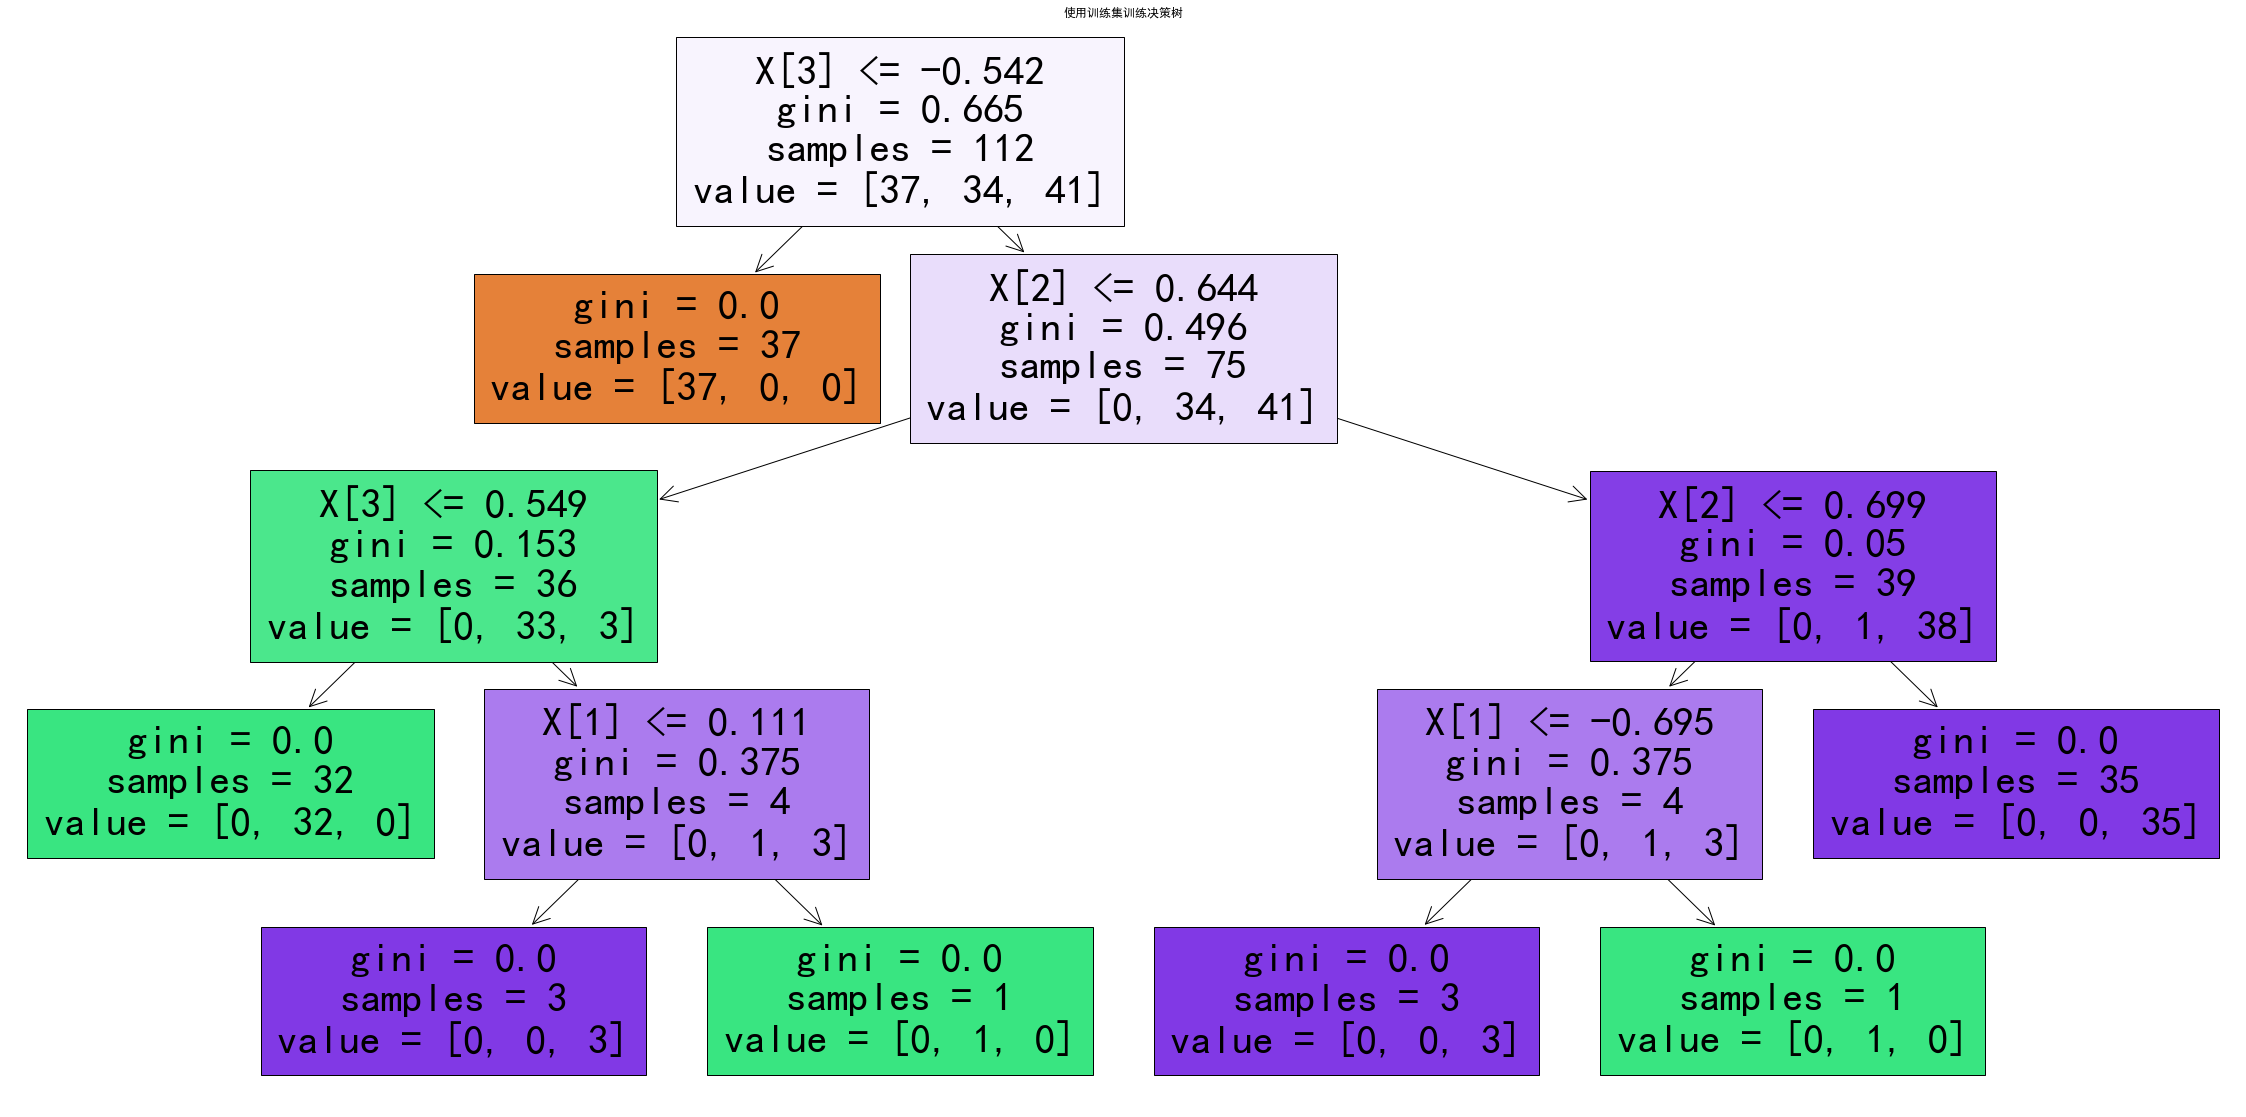

In [22]:
# 导入绘制树的方法
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier() # 实例化
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
# 决策树的输出窗口大小
plt.figure(figsize=(40,20))
# 提供训练集来绘制
clf = clf.fit(X_train, y_train)
plot_tree(clf, filled=True)
plt.title("使用训练集训练决策树")
plt.show()

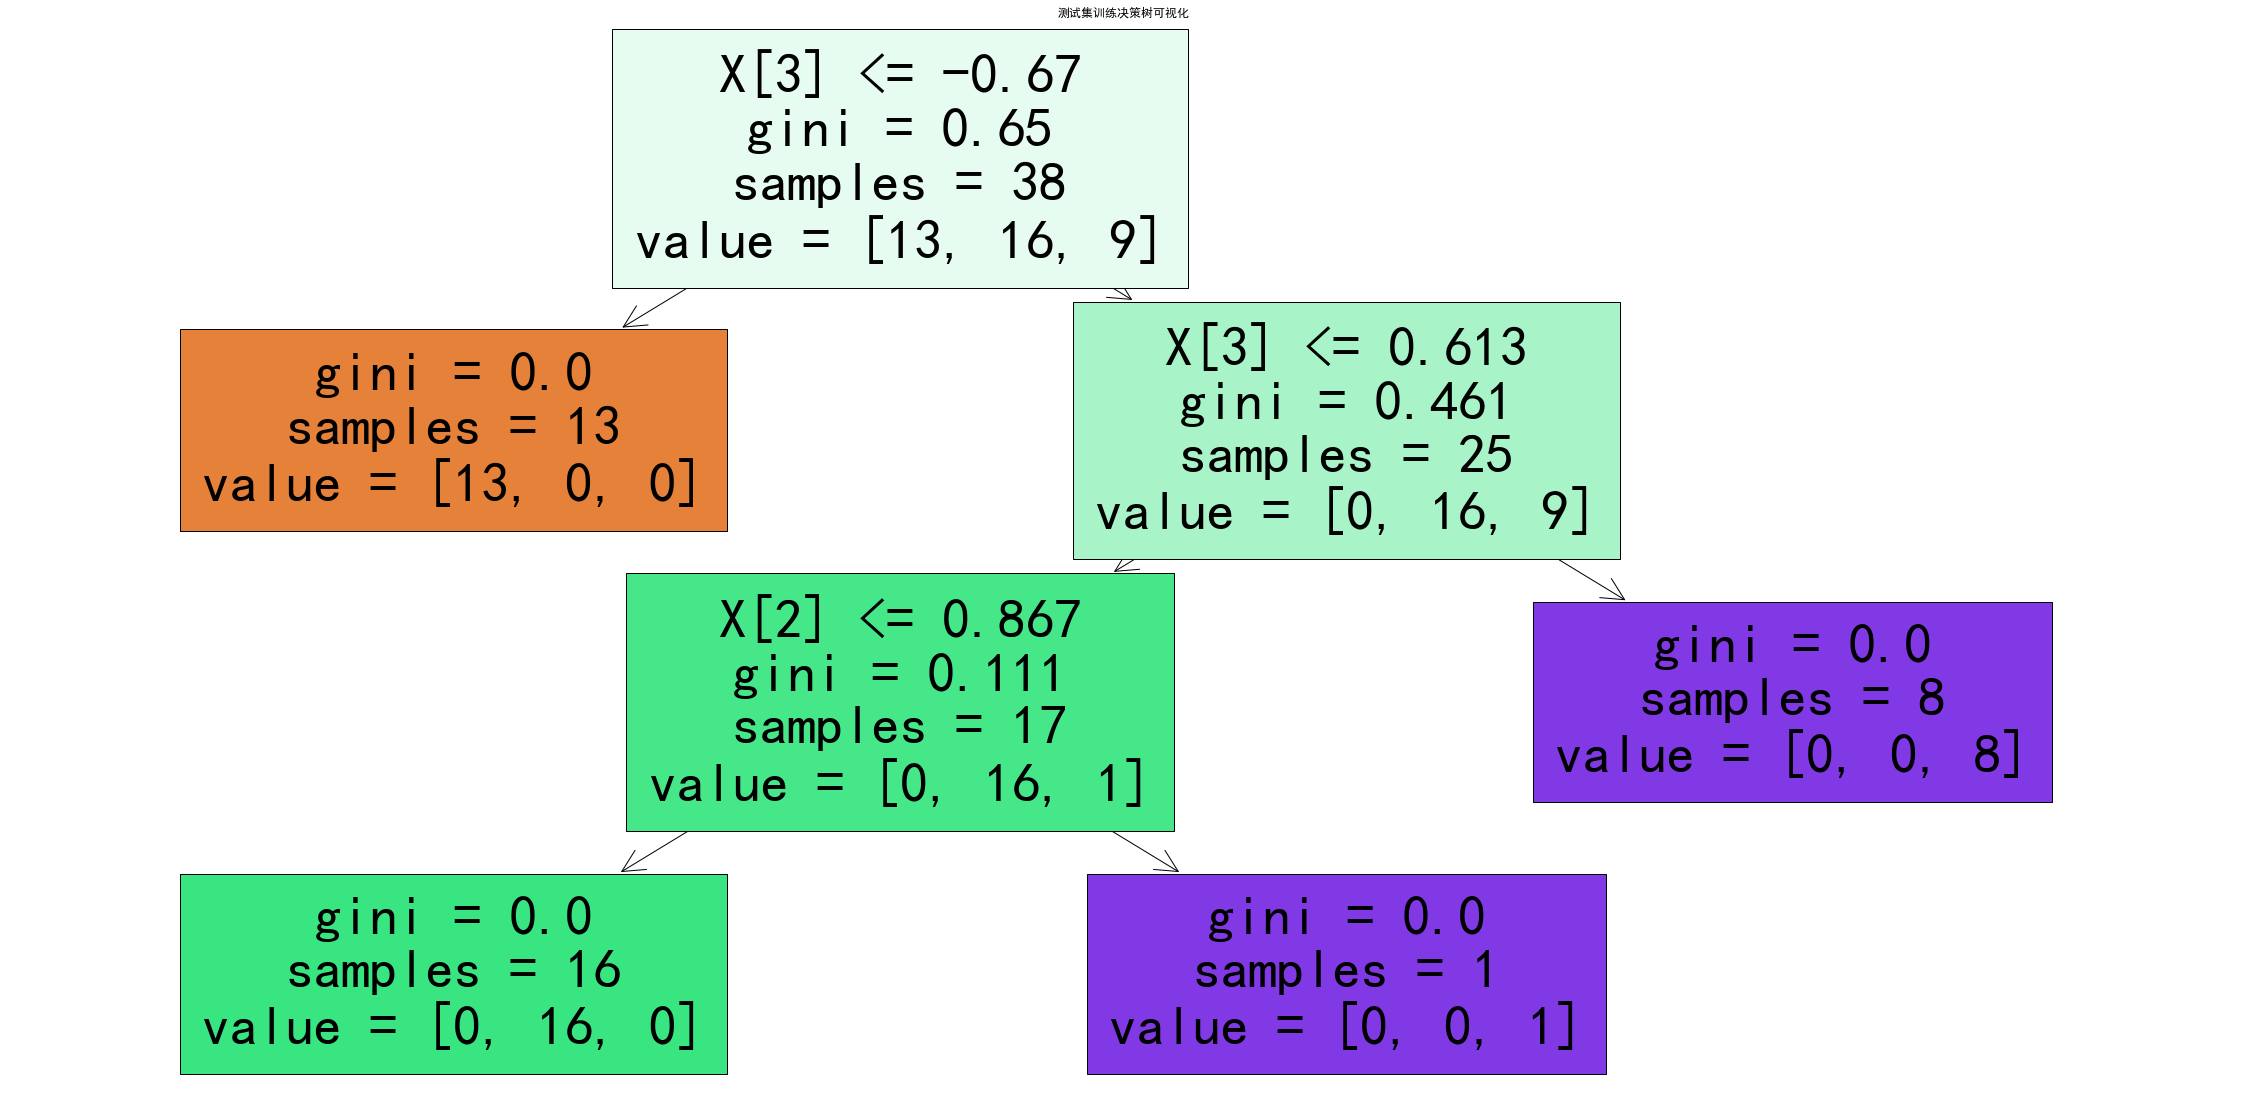

In [23]:
#同样，我们也可以可视化测试数据集形成的决策树。
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()
plt.figure(figsize=(40,20))
# 提供测试集训练
clf = clf.fit(X_test, y_test)
plot_tree(clf, filled=True)
plt.title("测试集训练决策树可视化")
plt.show()

In [24]:
# 文本形式可视化
from sklearn import tree
# clf为训练好的模型
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_3 <= -0.67
|   |--- class: Iris-setosa
|--- feature_3 >  -0.67
|   |--- feature_3 <= 0.61
|   |   |--- feature_2 <= 0.87
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  0.87
|   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  0.61
|   |   |--- class: Iris-virginica

